### Complex Numbers as Vectors
We saw that a complex number $z = a + bi$ is equivalent to (and therefore can be represented as) the ordered tuple $(a; b)$, which can be plotted in a 2D space. So, complex numbers and 2D points are equivalent. What is more, we can draw a vector from the origin of the coordinate plane to our point. This is called a point's **radius-vector**.

Let's try plotting complex numbers as radius vectors. Don't forget to label the real and imaginary axes. Also, move the axes to the origin. Hint: These are called "spines"; you'll need to move 2 of them to the origin and remove the other 2 completely. Hint 2: You already did this in the previous lab.

We can use `plt.quiver()` to plot the vector. It can behave a bit strangely, so we'll need to set the scale of the vectors to be the same as the scale on the graph axes:
```python
plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
```

Other than that, the main parameters are: $x_{begin}$, $y_{begin}$, $x_{length}$, $y_{length}$ in that order.

Now, set the aspect ratio of the axes to be equal. Also, add grid lines. Set the axis numbers (called ticks) to be something like `range(-3, 4)` for now.
```python
plt.xticks(range(-4, 4))
plt.yticks(range(-4, 4))

```

If you wish to, you can be a bit more clever with the tick marks. Find the minimal and maximal $x$ and $y$ values and set the ticks according to them. It's a good practice not to jam the plot too much, so leave a little bit of space. That is, if the actual x-range is $[-2; 2]$, set the plotting to be $[-2.5; 2.5]$ for example. Otherwise, the vector heads (arrows) will be "jammed" into a corner or side of the plot.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter
from matplotlib.transforms import ScaledTranslation

In [56]:
# Hide one of the zeroes in the center.
class HideZeroFormatter(ScalarFormatter):
    """ Display an empty label if value == 0."""
    def __call__(self, value, pos=None):
        return '' if value == 0 else ScalarFormatter.__call__(self, value, pos)

def move_zero_tick_label(axis):
    labels = axis.get_majorticklabels()
    for label in labels:
        if label.get_text() == "0":
            label.set_transform(label.get_transform() + ScaledTranslation(-0.1, 0, axis.figure.dpi_scale_trans))

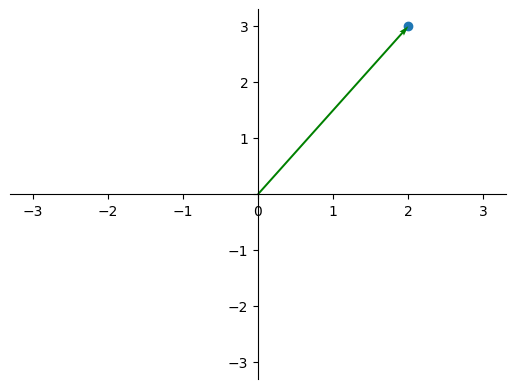

In [57]:
def plot_complex_number(z: complex):
    """
    Plots the complex number z as a radius vector in the 2D space
    """
    # Move the axes to the origin.
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Hide the zero for Y axis and move the zero for X axis.
    ax.yaxis.set_major_formatter(HideZeroFormatter())
    move_zero_tick_label(ax.xaxis) # Add transformation (move zero label)
    
    # Set the aspect ratio of the axes.
    max_range = (z.real + 1) * 1.1
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])   

    plt.scatter([z.real], [z.imag])

    # Plot the vector.
    plt.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1, width=0.004, color = "g")
    plt.show()

plot_complex_number(2 + 3j)

How about many numbers? We'll need to get a little bit more creative. First, we need to create a 2D array, each element of which will be a 4-element array: `[0, 0, z.real, z.imag]`. Next, `plt.quiver()` can accept a range of values. Look at [this StackOverflow post](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib) for details and adapt your code.

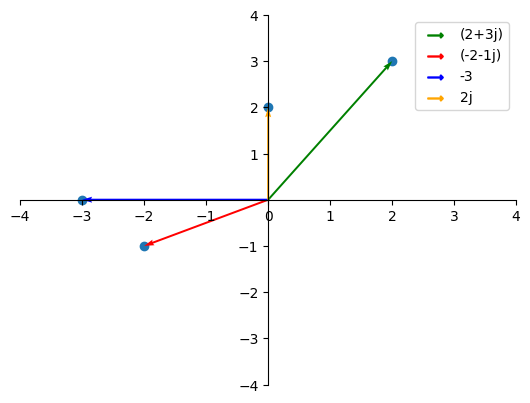

In [58]:
def plot_complex_numbers(numbers: list, colors: list, draw_circle: bool = False):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    # Move the axes to the origin.
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Hide the zero for Y axis and move the zero for X axis.
    ax.yaxis.set_major_formatter(HideZeroFormatter())
    move_zero_tick_label(ax.xaxis) # Add transformation (move zero label)

    # Prepare the data points.
    zeros = [0 for _ in numbers]
    real_parts = [n.real for n in numbers]
    imag_parts = [n.imag for n in numbers]

    # Set the aspect ratio of the axes.
    max_range = abs(max(real_parts + imag_parts, key=abs)) + 1
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])

    # Draw circle line
    if draw_circle:
        max_radius = 0
        for n in numbers:
            x = abs(n.real)
            y = abs(n.imag)
            radius = np.sqrt(x**2 + y**2)
            max_radius = max(max_radius, radius)
        theta = np.linspace(0, 2*np.pi, 100)
        x = max_radius * np.cos(theta)
        y = max_radius * np.sin(theta)
        plt.plot(x, y, color="black", linestyle='dashed', linewidth=1)
        plt.axis('equal')

    # Plot the data points.
    plt.scatter(real_parts, imag_parts)
    # Plot the vectors.
    plt.quiver(zeros, zeros, real_parts, imag_parts, angles = "xy", scale_units = "xy", scale = 1, width=0.004, color = colors)
    # Add legend for the vectors
    for i, n in enumerate(numbers):
        plt.scatter([], [], marker=r'$\longrightarrow$', c=colors[i], s=120, label=n)
    plt.legend(loc="upper right")

    plt.show()

plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

Now let's add two numbers and plot the result.

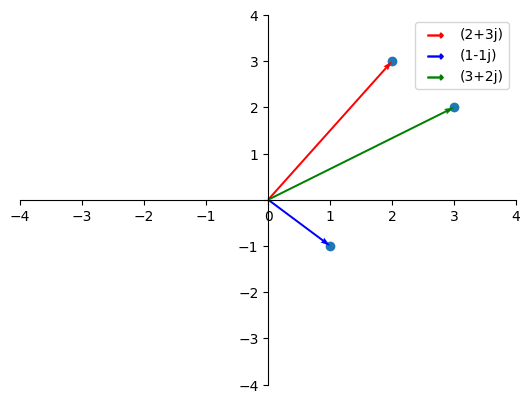

In [59]:
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

We can see that adding the complex numbers is equivalent to adding vectors (remember the "parallelogram rule"). As special cases, let's try adding pure real and pure imaginary numbers:

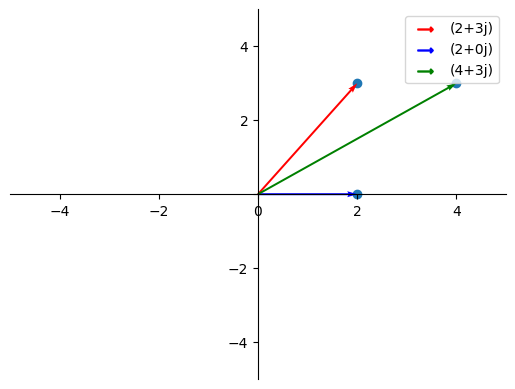

In [60]:
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

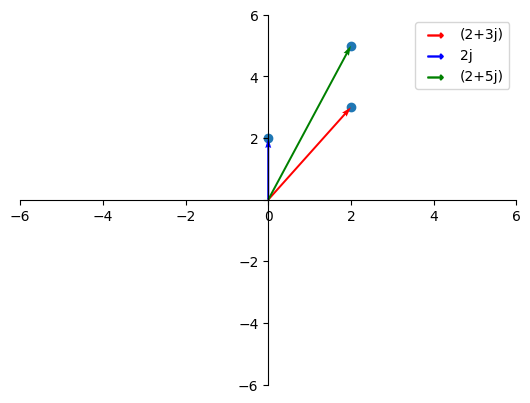

In [61]:
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers([z1, z2, z1 + z2], ["red", "blue", "green"])

How about multiplication? First we know that multiplying by 1 gives us the same vector and mulpiplying by -1 gives us the reversed version of the same vector. How about multiplication by $\pm i$?

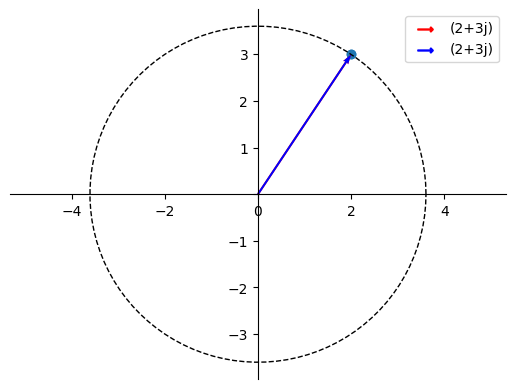

In [62]:
z = 2 + 3j
plot_complex_numbers([z, z * 1], ["red", "blue"], True)

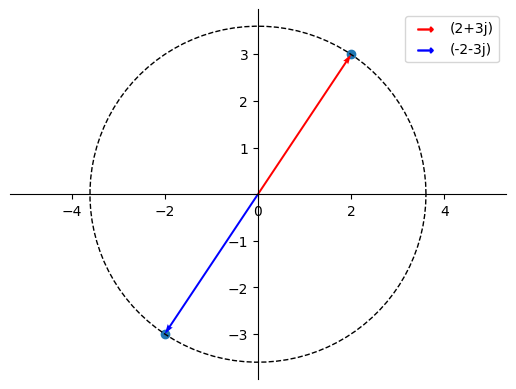

In [63]:
plot_complex_numbers([z, z * -1], ["red", "blue"], True)

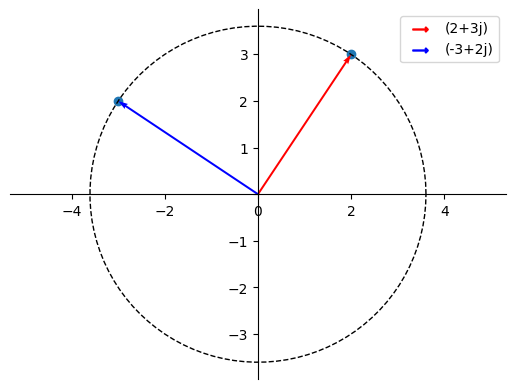

In [64]:
plot_complex_numbers([z, z * 1j], ["red", "blue"], True)

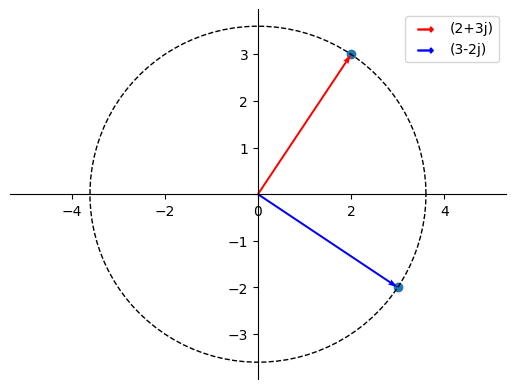

In [65]:
plot_complex_numbers([z, z * -1j], ["red", "blue"], True)

So, multiplication by $i$ is equivalent to 90-degree rotation. We can actually see the following equivalence relationships between multiplying numbers and rotation about the origin:

| Real | Imaginary | Result rotation |
|------|-----------|-----------------|
| 1    | 0         | $0^\circ$       |
| 0    | 1         | $90^\circ$      |
| -1   | 0         | $180^\circ$     |
| 0    | -1        | $270^\circ$     |

Once again, we see the power of abstraction and algebra in practice. We know that complex numbers and 2D vectors are equivalent. Now we see something more: addition and multiplication are equivalent to translation (movement) and rotation!

Let's test the multiplication some more. We can see the resulting vector is the sum of the original vectors, but *scaled and rotated*:

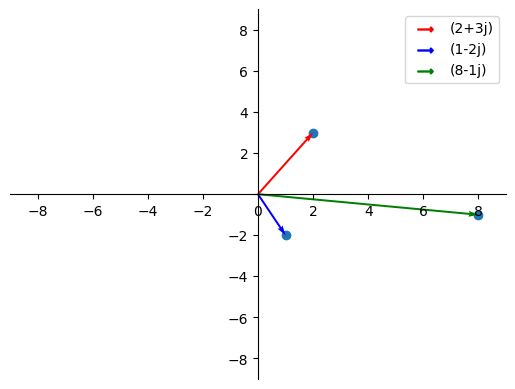

In [66]:
z1 = 2 + 3j
z2 = 1 - 2j
plot_complex_numbers([z1, z2, z1 * z2], ["red", "blue", "green"])

#### **Bonus:** How do **complex numbers** and **rotations** relate? 

#### Statement
Complex numbers and rotation-scaling matrices are basically the same. <br>

#### Proof
##### What is a Matrix
A matrix is a rectangular arrangement of numbers into rows and columns. For example matrix of 2 rows and 3 columns would like this:
$$ \begin{pmatrix} 2 & 1 & 3\\ 2 & 6 & 8 \end{pmatrix} $$

##### What is a Transformation Matrix
A transformation matrix is a square matrix, which represents a linear transformation in vector space. For example, matrices are often used in computer graphics to **rotate** and **scale** images and vectors.

![90 degree rotation](img/matrices/t_matrix_1.png)

##### How does Transformation Matrix work

Let's rotate a rectangle ($ABCD$) 90° anticlockwise. This happens by multiplying each of the rectangle points ($A, B, C, D$) with a 90° anticlockwise transformation matrix 

$$ \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} $$

And here are the coordinates of the new, *rotated* rectangle ($A'B'C'D'$)

$$ A' = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}  $$
$$ B' = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 3 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 3 \end{pmatrix}  $$
$$ C' = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 3 \\ 1 \end{pmatrix} = \begin{pmatrix} -1 \\ 3 \end{pmatrix}  $$
$$ D' = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} -1 \\ 0 \end{pmatrix}  $$


![90 degree rotation (part 2)](img/matrices/t_matrix_2.png)

##### What is Rotation-Scaling Matrix
A rotation-scaling matrices are a specific subtype of transformation matrices. The result of rotation-scaling transformation is basically ... rotation and scaling. :) These matrices are also being called "[C-matrices](https://en.wikipedia.org/wiki/Conference_matrix)".

For 2D rotation a 2 × 2 matrix is being used of type $ \begin{pmatrix} a & -b \\ b & a \end{pmatrix} $ where $a$ and $b$ are real numbers, not both equal to zero. And the rotation matrix could be presented entirely by the angle $ \theta $ between the two vectors (the base one and the target one).

![Rotation matrix)](img/matrices/t_matrix_3.png)

##### Complex numbers and Rotation-Scaling Matrices
If we represent complex numbers by $ z = a + bi $ and rotation matrices by $ C = \begin{pmatrix} a & -b \\ b & a \end{pmatrix} $ , then we can represent $C$ as $C = aI + bJ$ where $I$ is the [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix) $ 1 \equiv \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $ and $J$ is the imaginary matrix $ J \equiv \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} $ , where $J$ has the same behaviour as the imaginary part $i$  (i.e. $J^2 = -I$ as $i^2 = -1$)


So, in short we have:
$$ z = a + bi , i^2 = -1 $$
$$ C = aI + bJ , J^2 = -I $$

Now if we represent them by their polar forms we get:
$$ z = r(cos\theta + i sin\theta) $$ 
$$ C = r \begin{pmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{pmatrix} $$

Now we can rewrite $C$ in the next form:
$$ C = r(I cos\theta + J sin\theta) $$

which looks exactly the same as the complex number $z$. 

NB: For stricter proof you can check [De Moivre's theorem](https://www.youtube.com/watch?v=J6TnZxUUzqU).


#### References
* [The scaling-rotation matrix - introduction](https://www.youtube.com/watch?v=FmlurQExkxg)
* [90 degree rotation t-matrix](https://www.youtube.com/watch?v=M7zJCMpPLKA)
* [Understanding the rotation matrix](https://www.youtube.com/watch?v=8GrdqAizcfU)
* [Relation between scaling rotation matrices and complex numbers](https://www.youtube.com/watch?v=WSW5R7U2Yb0)
* [Scaling rotation matrices and complex numbers](https://www.youtube.com/watch?v=WYbhTGzn-00)
